In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('sample_data/Credit Card Customer Data.csv')

In [ ]:
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  ...  Total_visits_bank  Total_visits_online  Total_calls_made
0      1         87073            100000  ...                  1                    1                 0
1      2         38414             50000  ...                  0                   10                 9
2      3         17341             50000  ...                  1                    3                 4
3      4         40496             30000  ...                  1                    1                 4
4      5         47437            100000  ...                  0                   12                 3

[5 rows x 7 columns]


In [ ]:
print(df.shape)

(660, 7)


In [ ]:
print(df.describe())

            Sl_No  Customer Key  ...  Total_visits_online  Total_calls_made
count  660.000000    660.000000  ...           660.000000        660.000000
mean   330.500000  55141.443939  ...             2.606061          3.583333
std    190.669872  25627.772200  ...             2.935724          2.865317
min      1.000000  11265.000000  ...             0.000000          0.000000
25%    165.750000  33825.250000  ...             1.000000          1.000000
50%    330.500000  53874.500000  ...             2.000000          3.000000
75%    495.250000  77202.500000  ...             4.000000          5.000000
max    660.000000  99843.000000  ...            15.000000         10.000000

[8 rows x 7 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


In [ ]:
print(df.isnull().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


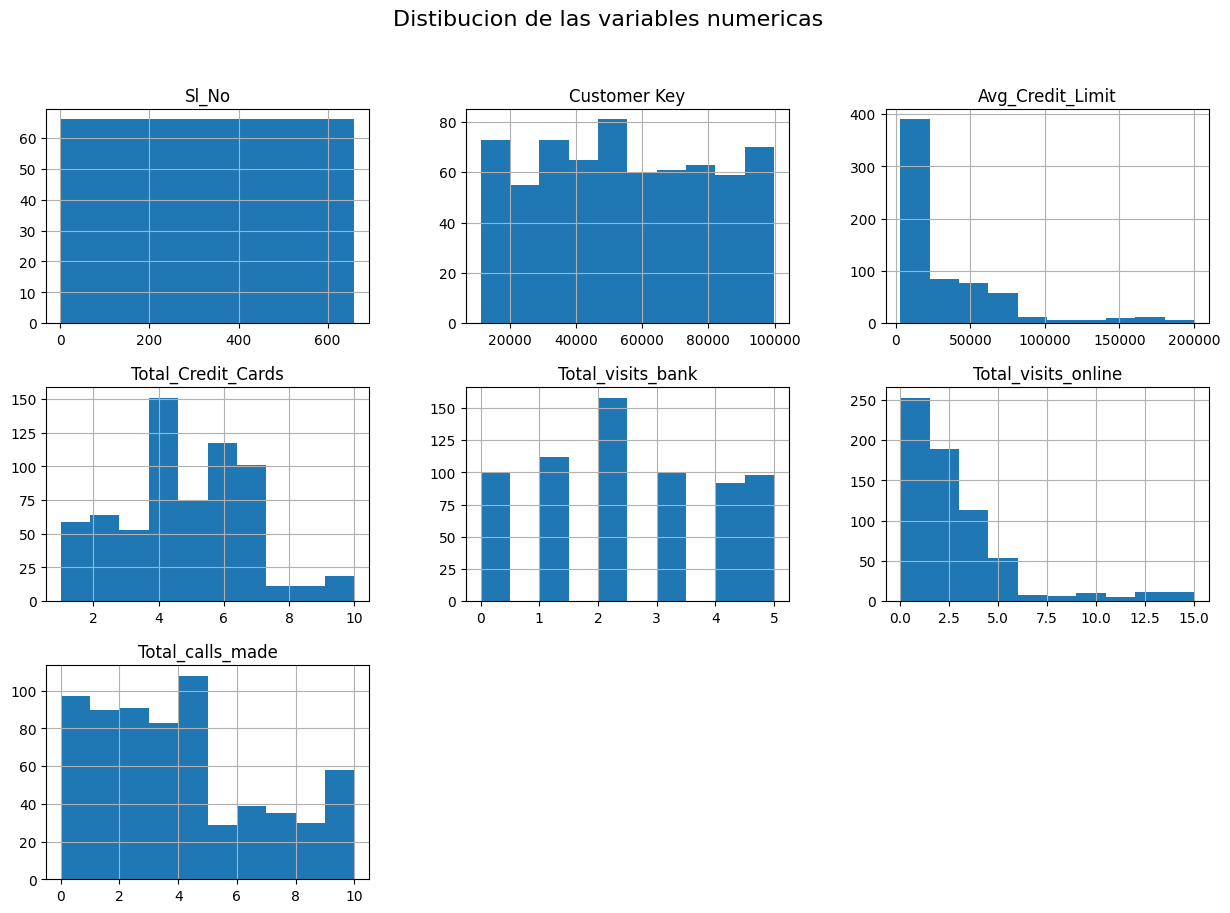

In [ ]:
df.hist(figsize=(15, 10))
plt.suptitle("Distibucion de las variables numericas", fontsize=16)
plt.show()

<Figure size 1500x1000 with 0 Axes>

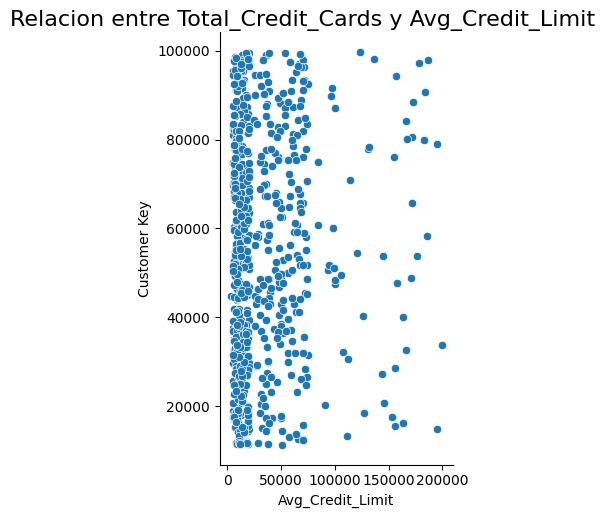

In [ ]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, x_vars=['Avg_Credit_Limit'], y_vars=['Customer Key'], height=5, aspect=0.7)
plt.suptitle("Relacion entre Total_Credit_Cards y Avg_Credit_Limit", fontsize=16, y=1.02)
plt.show()

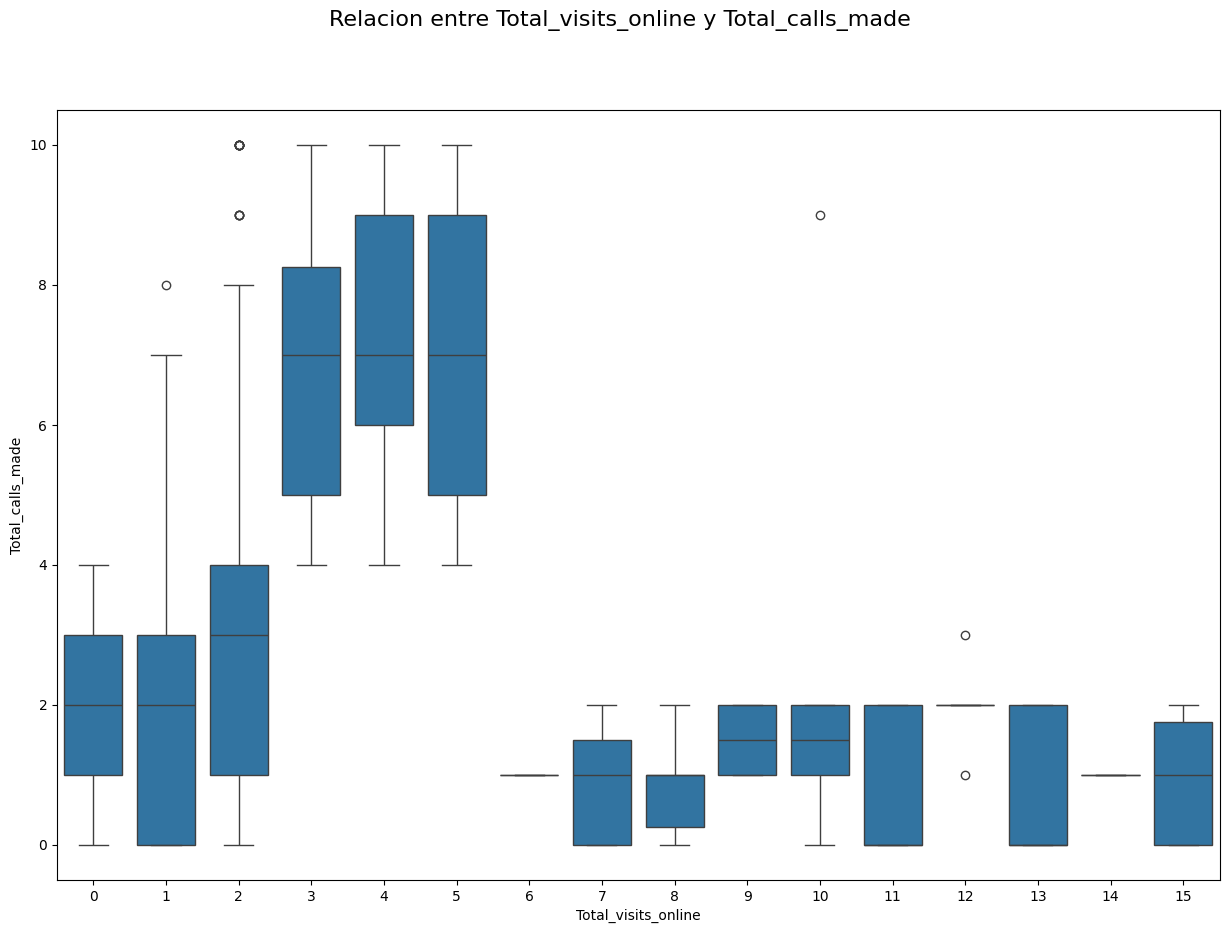

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Total_visits_online', y='Total_calls_made', data=df)
plt.suptitle("Relacion entre Total_visits_online y Total_calls_made", fontsize=16)
plt.show()

In [ ]:
features = ["Sl_No", 'Customer Key', 'Avg_Credit_Limit','Total_Credit_Cards', "Total_visits_bank", "Total_visits_online", "Total_calls_made" ]
df_features = df[features]

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [ ]:
print("Datos normalizados")
print(df_scaled[:5])

Datos normalizados
[[-1.72942847  1.24691971  1.74018685 -1.24922476 -0.86045063 -0.54748969
  -1.25153737]
 [-1.72417983 -0.65320273  0.41029254 -0.78758515 -1.47373077  2.5205186
   1.89185881]
 [-1.71893118 -1.47609839  0.41029254  1.05897329 -0.86045063  0.13428993
   0.1455276 ]
 [-1.71368254 -0.57190112 -0.12166518  0.13569407 -0.86045063 -0.54748969
   0.1455276 ]
 [-1.70843389 -0.30085671  1.74018685  0.59733368 -1.47373077  3.20229822
  -0.20373864]]


In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

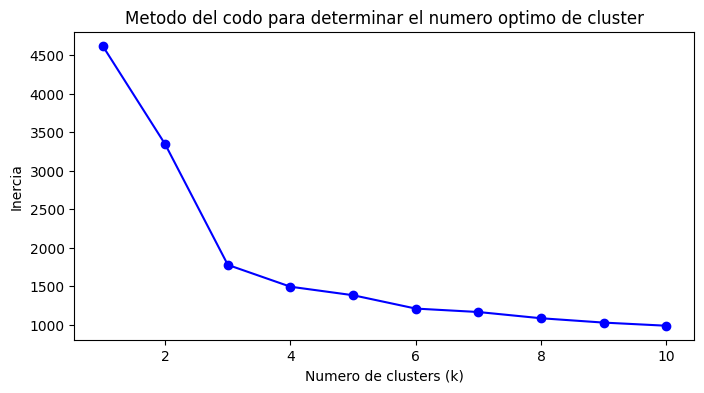

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel("Numero de clusters (k)")
plt.ylabel("Inercia")
plt.title("Metodo del codo para determinar el numero optimo de cluster")
plt.show()

In [ ]:
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
data = kmeans.fit_predict(df_scaled)

df['cluster'] = data

print("Informacion con cluster asignado")
print(df.head(10))

Informacion con cluster asignado
   Sl_No  Customer Key  Avg_Credit_Limit  ...  Total_visits_online  Total_calls_made  cluster
0      1         87073            100000  ...                    1                 0        2
1      2         38414             50000  ...                   10                 9        2
2      3         17341             50000  ...                    3                 4        2
3      4         40496             30000  ...                    1                 4        2
4      5         47437            100000  ...                   12                 3        0
5      6         58634             20000  ...                    1                 8        2
6      7         48370            100000  ...                   11                 2        0
7      8         37376             15000  ...                    1                 1        2
8      9         82490              5000  ...                    2                 2        2
9     10         44770     

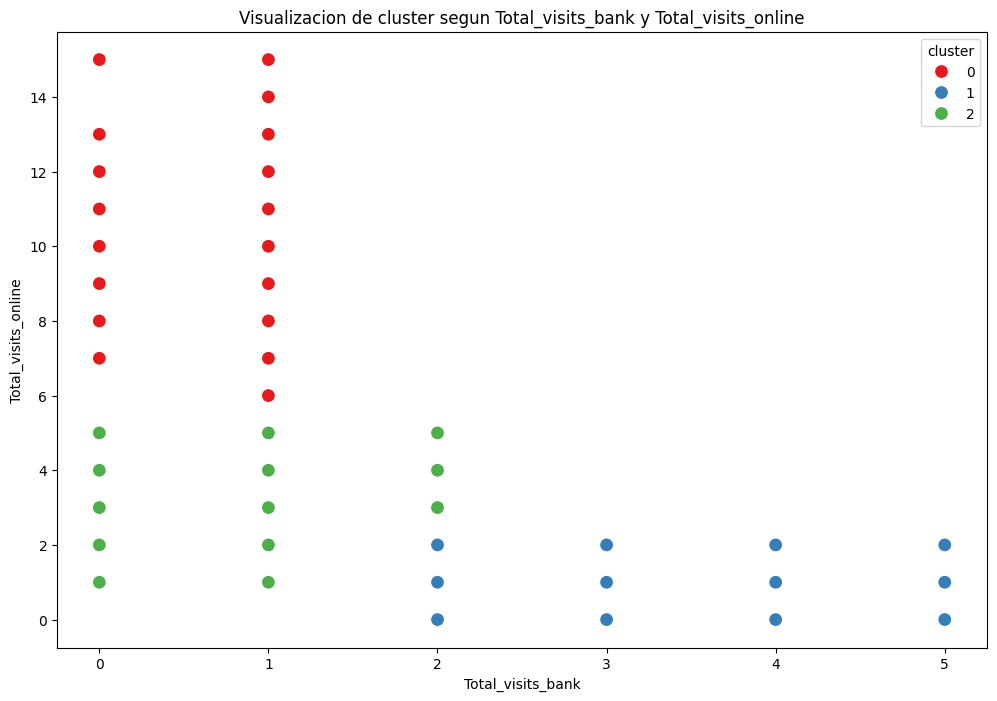

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_bank', y='Total_visits_online', hue='cluster', data=df, palette= "Set1", s=100)
plt.title("Visualizacion de cluster segun Total_visits_bank y Total_visits_online")
plt.show()

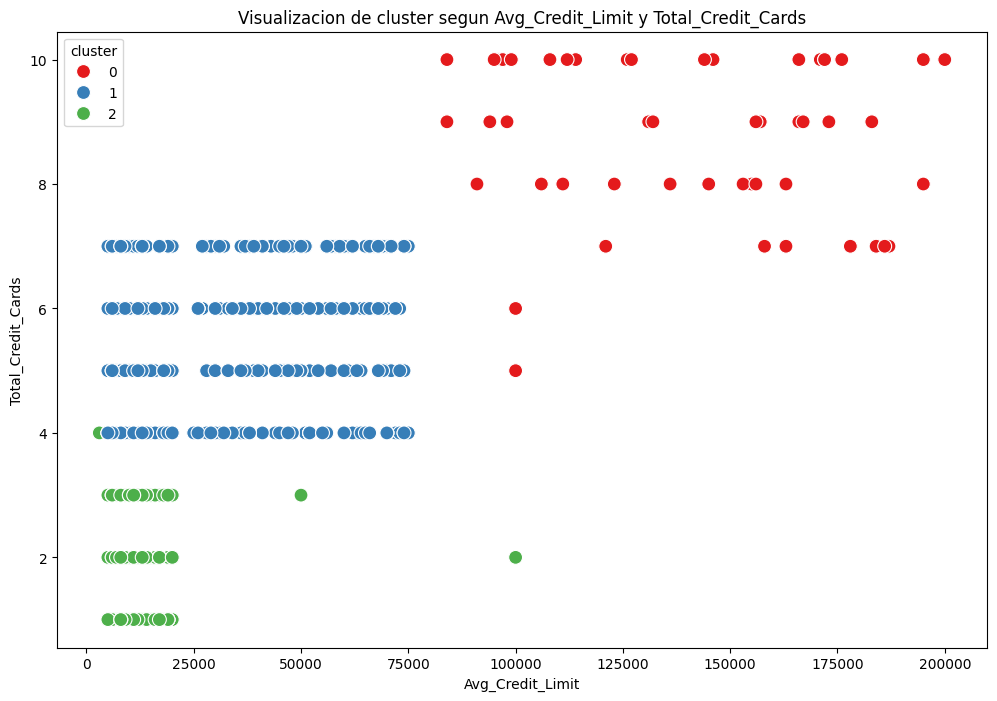

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='cluster', data=df, palette='Set1', s=100)
plt.title("Visualizacion de cluster segun Avg_Credit_Limit y Total_Credit_Cards")
plt.show()

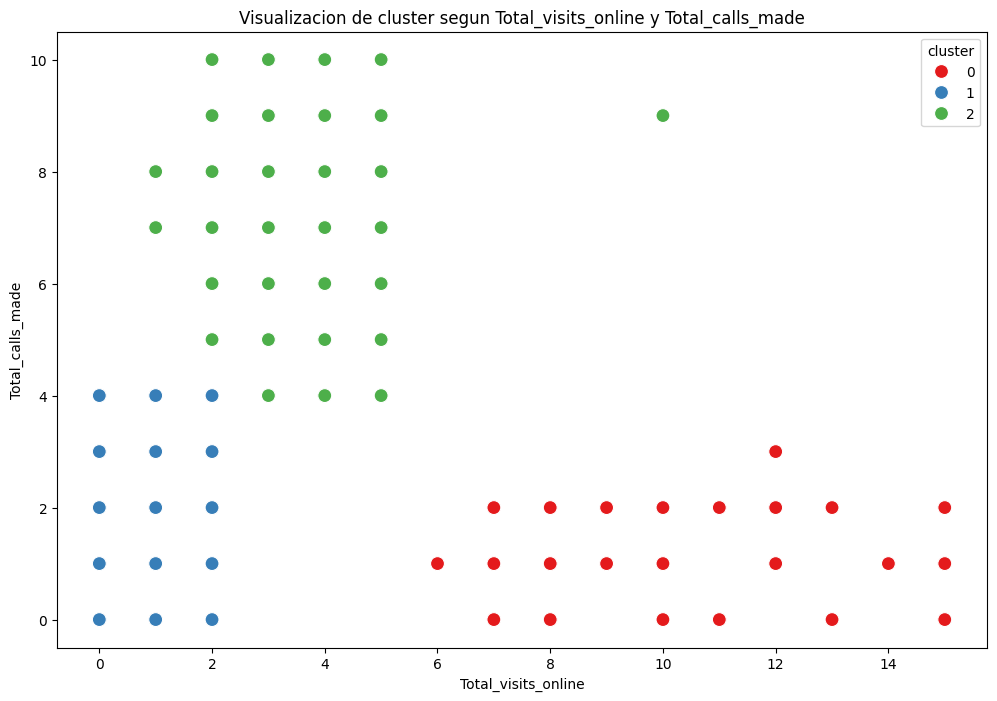

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_visits_online', y='Total_calls_made', hue='cluster', data=df, palette='Set1', s=100)
plt.title("Visualizacion de cluster segun Total_visits_online y Total_calls_made")
plt.show()

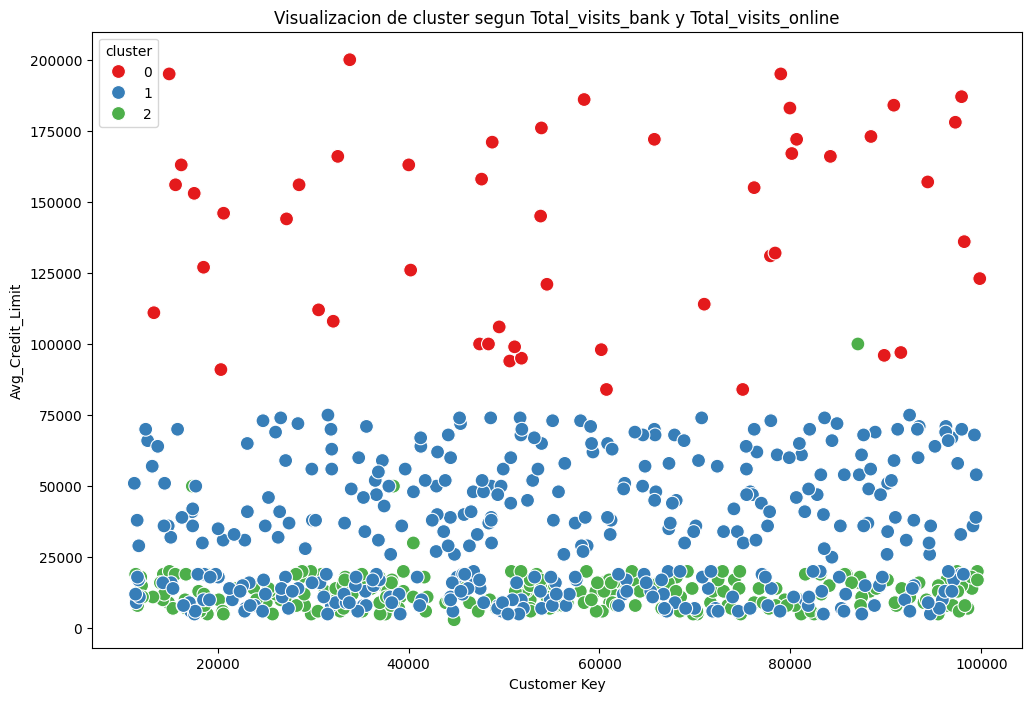

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Customer Key', y='Avg_Credit_Limit', hue='cluster', data=df, palette= "Set1", s=100)
plt.title("Visualizacion de cluster segun Total_visits_bank y Total_visits_online")
plt.show()